In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import math 

In [14]:
os.getcwd()

'/home/jovyan'

In [15]:
Prod = pd.read_csv('ProdData.csv')

In [16]:
len(Prod)

50

In [22]:
Prod['Month'] = range(1, 1 + len(Prod))
Prod['Daily'] = Prod['Month'] * 30 
Prod['SqrDaily'] =Prod['Daily']**0.5
Prod['OilRateDailyInverse'] = (Prod['Oil_bbl']/30.4375)**-1
Prod.head()

,name,date,month,year,Oil_bbl,Gas_Mcf,Water_bbl,boe _ Monthly,Month,Daily,SqrDaily,OilRateDailyInverse
0,PECK STATE 258 6H,2014-12-01T00:00:00,0,0,35381,25113,17208,39566.50000,1,30,5.477226,0.000860
1,PECK STATE 258 6H,2015-01-01T00:00:00,0,0,29858,30149,16337,34882.83333,2,60,7.745967,0.001019
2,PECK STATE 258 6H,2015-02-01T00:00:00,0,0,32714,27494,16094,37296.33333,3,90,9.486833,0.000930
3,PECK STATE 258 6H,2015-03-01T00:00:00,0,0,34951,23282,15410,38831.33333,4,120,10.954451,0.000871
4,PECK STATE 258 6H,2015-04-01T00:00:00,0,0,29157,12509,10956,31241.83333,5,150,12.247449,0.001044


In [20]:
#ProdSqrt = np.sqrt(Prod['Oil_bbl'])

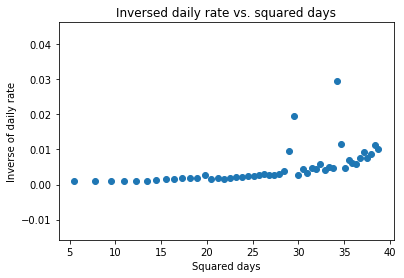

In [29]:
plt.scatter(Prod['SqrDaily'],Prod['OilRateDailyInverse'])
plt.title('Inversed daily rate vs. squared days')
plt.xlabel('Squared days')
plt.ylabel('Inverse of daily rate')
plt.show()

In [31]:
X = Prod['SqrDaily']
Y  = Prod['OilRateDailyInverse']

In [32]:
import statsmodels.api as sm

In [33]:
model  = sm.OLS(Y,X).fit()

In [71]:
 model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     OilRateDailyInverse   R-squared:                       0.619
Model:                             OLS   Adj. R-squared:                  0.611
Method:                  Least Squares   F-statistic:                     79.47
Date:                 Mon, 15 Apr 2019   Prob (F-statistic):           7.91e-12
Time:                         19:54:37   Log-Likelihood:                 201.44
No. Observations:                   50   AIC:                            -400.9
Df Residuals:                       49   BIC:                            -399.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SqrDaily       0.0002   2.22e-05      8.914      0.000       0.000       0.000
==============================================================================
Omnibus:                       72.027   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.259
Skew:                           3.885   Prob(JB):                    7.85e-151
Kurtosis:                      19.475   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
## Formation Data 
B = 1.3    ## Oil volume factor , bbl/stb 
h = 593   ## Formation height from Biota , ft 
Vis =0.7 ## viscosity , cp 
Por =0.15 ## porosity 
Comp = 0.000075 ##compressibility , 1/psi
Pi = 7252 ##initial pressure, psi 
Pwf= 1500 ##wellbore pressure, psi
perm = 0.00286 ## permeability, md
LL = 6500 ## lateral length, ft 
Stages = 40 ## number of stages 


In [61]:
##Calculating fracture half-length 
## 1/q = mt^0.5 + b 
## m = 31.3*B *(Vis/(Por*Comp))^0.5 /(h*xf*k^0.5*(pi - pwf))

In [62]:
halflengthperm = 31.3 * B * (Vis/(Por * Comp))**0.5 /(h * m *(Pi-Pwf))

In [92]:
halflength = (halflengthperm/ perm**0.5).round(0)

In [88]:
##print("half length is {} ft".format(halflength))

half length is SqrDaily    281.0
dtype: float64 ft


In [104]:
##Calculating end of linear flow 
## telf = ((A * h * phi *comp * m *(Pi-Pwf))/(19.9*B))^2

A = 2 * halflength* LL /(Stages - 1)
telf = ((A * h * Por * Comp * m * (Pi-Pwf))/(19.9 * B))**2

In [108]:
 telf ##days
 telf_month = telf/30

In [63]:
test =pd.read_csv('test.csv')
test

,Unnamed: 0,well_name,m,b,vis,por,ct,k,h1,h2,h3,xf1,xf2,xf3
0,0,Well 1,98,2.74,0.73,0.08,0.000014,0.005,100,300,500,NaN,NaN,NaN
1,1,Well 2,50,2.50,0.65,0.05,0.000014,0.005,300,400,800,NaN,NaN,NaN
2,2,Well 3,40,2.10,0.55,0.03,0.000014,0.005,600,900,1100,NaN,NaN,NaN


In [64]:

## Formation Data 
def half_length(B, vis, por, ct, k , m, h1 , h2, h3):
#B = 1.3    ## Oil volume factor , bbl/stb 
#h = 593   ## Formation height from Biota , ft 
#vis =0.7 ## viscosity , cp 
#por =0.15 ## porosity 
#ct = 0.000075 ##compressibility , 1/psi

    half_length1 = (19.927 * B * math.sqrt(vis/(por*ct)))/(m*h1* math.sqrt(k))
    half_length2 = (19.927 * B * math.sqrt(vis/(por*ct)))/(m*h2* math.sqrt(k))
    half_length3 = (19.927 * B * math.sqrt(vis/(por*ct)))/(m*h3*math.sqrt(k))

    return (half_length1,half_length2,half_length3)

In [67]:
for index, row in test.iterrows():
   
    xf1,xf2,xf3 = (half_length(row.loc['b'], row.loc['vis'], row.loc['por'], row.loc['ct'], row.loc['k'], row.loc['m'], row.loc['h1'], row.loc['h2'], row.loc['h3']))
#     row.replace('xf1',xf1)
#     row.replace('xf2',xf2)
#     row.replace('xf3', xf3)
    test.loc[index, 'xf1'] = xf1
    test.loc[index, 'xf2'] = xf2
    test.loc[index, 'xf3'] = xf3
    #print(test)
#(half_length(row.loc['b'], row.loc['vis'], row.loc['por'], row.loc['ct'], row.loc['k'], row.loc['m'], row.loc['h1'], row.loc['h2'], row.loc['h3']))
test.to_csv('test.csv')

In [68]:
test

,Unnamed: 0,well_name,m,b,vis,por,ct,k,h1,h2,h3,xf1,xf2,xf3
0,0,Well 1,98,2.74,0.73,0.08,0.000014,0.005,100,300,500,64.186914,21.395638,12.837383
1,1,Well 2,50,2.50,0.65,0.05,0.000014,0.005,300,400,800,45.669472,34.252104,17.126052
2,2,Well 3,40,2.10,0.55,0.03,0.000014,0.005,600,900,1100,28.473073,18.982049,15.530767
